In [53]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

['NanumGothic',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquareRound',
 'NanumSquare']

In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [55]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [56]:
import os
import pandas as pd

os.getcwd()

'/home/piai/BIG DATA 강의자료'

## 청년 AI.Big Data 아카데미 예측분석

### 회귀분석-규제화 연습 (72 P)

In [57]:
# 73 Page
import pandas as pd
# 학습용/평가용 데이터 분리:train, test
from sklearn.model_selection import train_test_split
# 선형회귀모형
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# 평가함수
from sklearn.metrics import r2_score

In [58]:
df_raw = pd.read_csv("/home/piai/바탕화면/01 실습파일/2. Big Data 분석/체질검사.csv", encoding = 'euc-kr')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15 lb,72.25 inch,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168 lb,71.25 inch,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75 lb,68.5 inch,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75 lb,65.75 inch,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219 lb,64 inch,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


In [59]:
# 단위와 같이 표현되어 있는 수치형 변수 처리
df_raw[['WEIGHT', 'WEIGHT_UNIT']] = df_raw['WEIGHT'].str.split(expand = True)
df_raw[['HEIGHT', 'HEIGHT_UNIT']] = df_raw['HEIGHT'].str.split(expand = True)
df_raw['WEIGHT'] = df_raw['WEIGHT'].astype('float64')
df_raw['HEIGHT'] = df_raw['HEIGHT'].astype('float64')

In [60]:
# 단위를 나타내는 항목 제외
df_raw = df_raw.drop(['WEIGHT_UNIT', 'HEIGHT_UNIT'], axis = 1)
# 범주형 변수의 Dummy 변수화
df_raw_dummy = pd.get_dummies(df_raw, drop_first = True)
df_raw_dummy.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,0
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,0
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,0
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,1
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,1


In [61]:
# 목표변수 분리
df_raw_y = df_raw_dummy["FAT"]
df_raw_x = df_raw_dummy.drop("FAT", axis = 1)

In [62]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                                test_size = 0.3, random_state = 1234) 
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 14)
train data Y size : (176,)
test data X size : (76, 14)
test data Y size : (76,)


In [63]:
# 74 Page
# 모델 생성
ridge = Ridge(random_state=1234, alpha = 1)
ridge.fit(df_train_x, df_train_y)
# 절편값 확인
print(ridge.intercept_)

-36.02048952086419


In [64]:
# 회귀계수 확인
df_ridge_coef = pd.DataFrame({"Coef": ridge.coef_}, index = df_train_x.columns)
df_ridge_coef

,Coef
AGE,0.064834
WEIGHT,-0.128249
HEIGHT,-0.088183
NECK,-0.406483
CHEST,0.162920
ABDOMEN,0.854706
HIP,-0.143801
THIGH,0.263459
KNEE,-0.132361
ANKLE,0.240876


<Axes: >

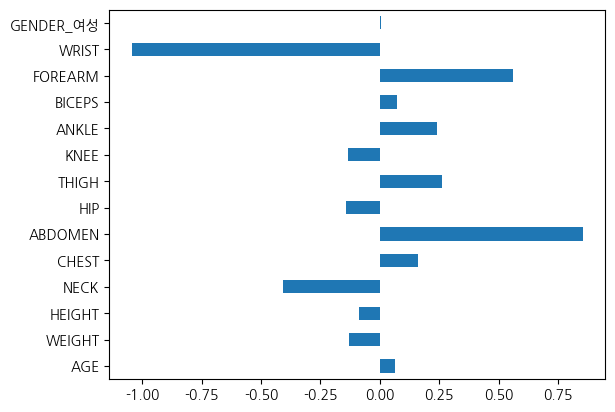

In [65]:
# 회귀계수 그래프
df_ridge_coef.plot.barh(y = "Coef", legend = False)

In [66]:
# 75 Page
# 모델의 성능
train_pred = ridge.predict(df_train_x)
test_pred = ridge.predict(df_test_x)
print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

train data의 결정계수: 0.7688328070099062
test data의 결정계수: 0.6641259577188787


In [67]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 208     8.0
94      9.6
31     34.3
248    23.6
216    31.4
6      23.3
91      5.2
73     12.5
129    13.9
5      24.2
Name: FAT, dtype: float64
test data의 예측값 : 
 [13.60282604 16.45073408 37.04384853 18.84719908 22.29182243 19.66883071
 16.30261479 12.57672671 14.84682774 23.98304519]


In [68]:
# 76 Page
# 모델 생성
lasso = Lasso(random_state=1234, alpha = 1)
lasso.fit(df_train_x, df_train_y)
# 절편값 확인
print(lasso.intercept_)

-39.35090439476541


In [69]:
# 회귀계수 확인
df_lasso_coef = pd.DataFrame({"Coef": lasso.coef_}, index = df_train_x.columns)
df_lasso_coef

,Coef
AGE,0.016229
WEIGHT,-0.123026
HEIGHT,-0.115243
NECK,-0.000000
CHEST,0.100403
ABDOMEN,0.833549
HIP,-0.000000
THIGH,0.000000
KNEE,-0.000000
ANKLE,0.000000


<Axes: >

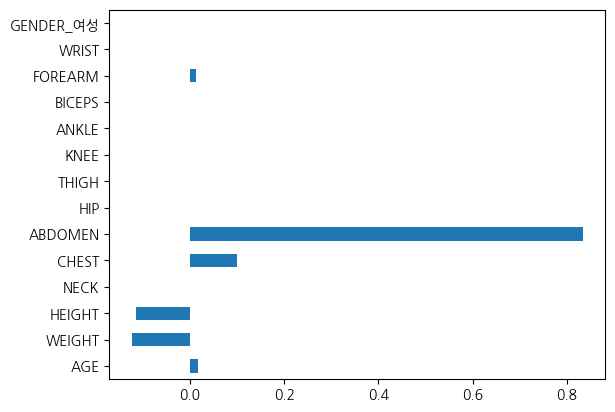

In [70]:
# 회귀계수 그래프
df_lasso_coef.plot.barh(y = "Coef", legend = False)

In [71]:
# 77 Page
# 모델의 성능
train_pred = lasso.predict(df_train_x)
test_pred = lasso.predict(df_test_x)
print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

train data의 결정계수: 0.7448823019911712
test data의 결정계수: 0.6397843604404869


In [72]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 208     8.0
94      9.6
31     34.3
248    23.6
216    31.4
6      23.3
91      5.2
73     12.5
129    13.9
5      24.2
Name: FAT, dtype: float64
test data의 예측값 : 
 [14.47038363 16.28754934 33.67464732 18.10744338 23.79126879 19.65277966
 14.95597729  9.61780438 16.5146437  23.5350198 ]


In [73]:
# 78 Page
# 모델 생성
elastic = ElasticNet(random_state=1234, alpha = 1, l1_ratio = 0.5)
elastic.fit(df_train_x, df_train_y)
# 절편값 확인
print(elastic.intercept_)

-47.00875497399706


In [74]:
# 회귀계수 확인
df_elastic_coef = pd.DataFrame({"Coef": elastic.coef_}, index = df_train_x.columns)
df_elastic_coef

,Coef
AGE,0.030322
WEIGHT,-0.146414
HEIGHT,-0.114964
NECK,-0.114761
CHEST,0.162783
ABDOMEN,0.808041
HIP,-0.000000
THIGH,0.107365
KNEE,-0.000000
ANKLE,0.000000


<Axes: >

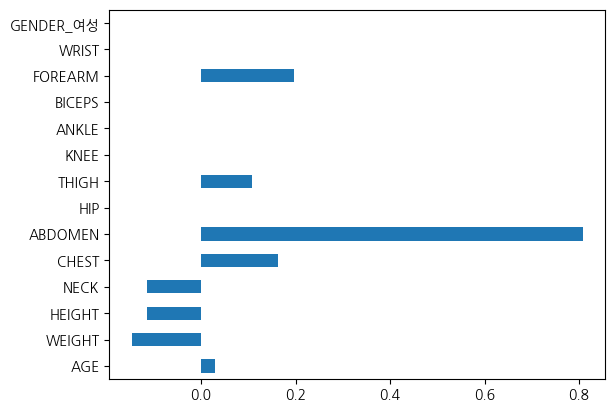

In [75]:
# 회귀계수 그래프
df_elastic_coef.plot.barh(y = "Coef", legend = False)

In [76]:
# 79 Page
# 모델의 성능
train_pred =elastic.predict(df_train_x)
test_pred = elastic.predict(df_test_x)
print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

train data의 결정계수: 0.7549442655494082
test data의 결정계수: 0.6366711782958271


In [77]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 208     8.0
94      9.6
31     34.3
248    23.6
216    31.4
6      23.3
91      5.2
73     12.5
129    13.9
5      24.2
Name: FAT, dtype: float64
test data의 예측값 : 
 [13.73844662 16.36476248 34.61249368 18.55642767 23.40560299 19.81954034
 15.17420329 10.47756547 16.18488347 23.83687672]
